In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create the toy dataset
X, y = make_circles(n_samples=1000, factor=0.01, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

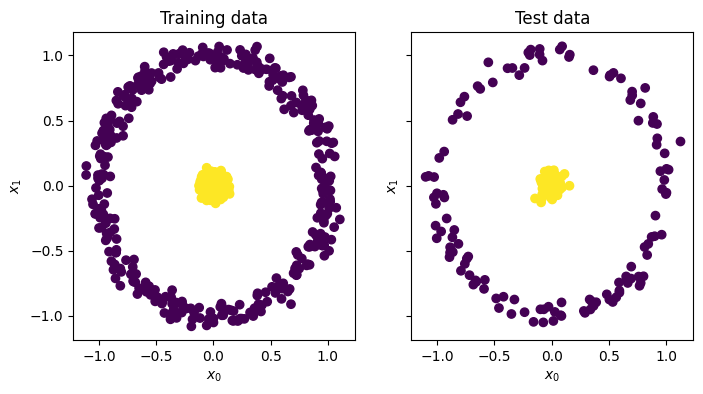

In [3]:
# Visualize the data
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap='viridis')
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Test data")
plt.show()

In [4]:
from sklearn.decomposition import PCA

# Fit on a PCA object
pca = PCA(n_components=2)

score_pca = pca.fit(X_train).transform(X_test)
pca

PCA(n_components=2)

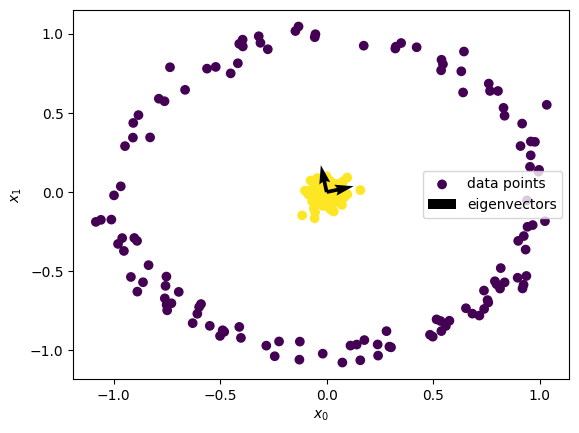

In [5]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,label="data points", cmap='viridis')
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label="eigenvectors")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.legend(loc='center right')
plt.show()

In [6]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')
    
    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)   
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)  
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point 
        w=A[i,:]

        # projection
        cv = (np.dot( A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

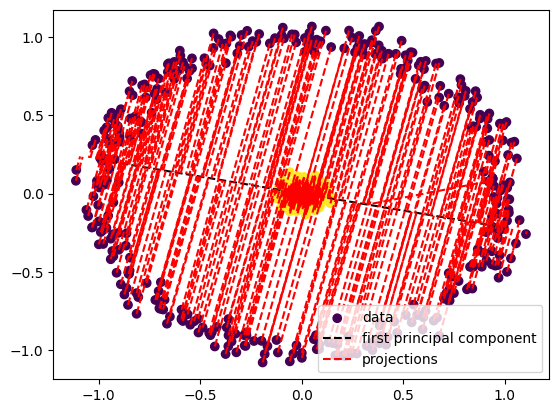

In [7]:
plot_proj(X_train,pca.components_[0,:],y_train,"first principal component")

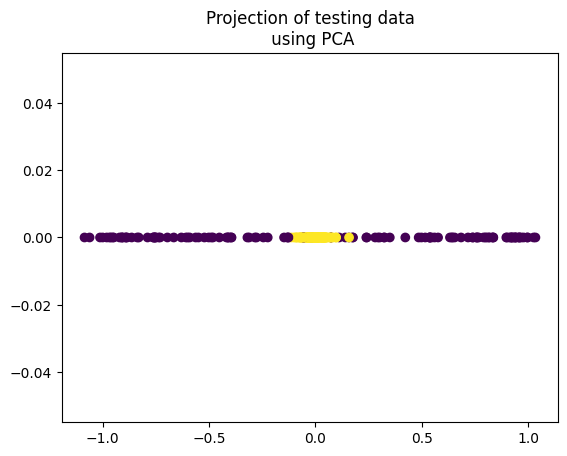

In [8]:
plt.scatter(score_pca [:,0],np.zeros(score_pca[:,0].shape[0]),c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

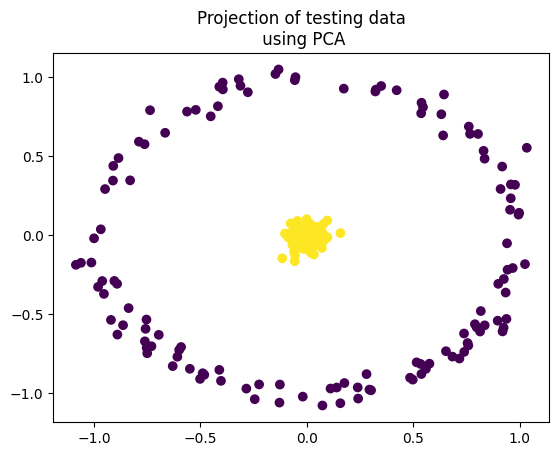

In [9]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train, y_train)
print(str.format("Test set  mean accuracy score for for PCA: {}", lr.score(X_test, y_test)))

Test set  mean accuracy score for for PCA: 0.496


In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def ppca_sklearn(X, p, max_iter=100, tol=1e-6):
    """
    Perform PPCA using the EM algorithm.

    Parameters:
        X (ndarray): The input data matrix (n_samples x n_features).
        p (int): The number of principal components (latent variables).
        max_iter (int): Maximum number of iterations for the EM algorithm.
        tol (float): Convergence tolerance.

    Returns:
        W (ndarray): The loading matrix (n_features x p).
        mu (ndarray): The mean vector (n_features).
        sigma2 (float): The noise variance.
        Z (ndarray): The latent variables (n_samples x p).
    """
    n_samples, n_features = X.shape

    # Center the data by subtracting the mean of X
    mu = np.mean(X, axis=0)
    X_centered = X - mu

    # Initialize W and sigma2
    W = np.random.randn(n_features, p)  # Initialize W randomly
    sigma2 = np.var(X_centered)  # Initial noise variance

    # Initialize latent variables Z
    Z = np.zeros((n_samples, p))

    for iteration in range(max_iter):
        # E-step: Compute the expected value of the latent variables Z
        cov_Z = np.linalg.inv(W.T @ W + sigma2 * np.eye(p))
        Z = (X_centered @ W) @ cov_Z.T

        # M-step: Update the parameters (W, mu, and sigma2)
        W_new = (X_centered.T @ Z) @ np.linalg.inv(Z.T @ Z + n_samples * sigma2 * np.eye(p))
        
        # Update sigma2 (noise variance)
        sigma2_new = np.sum(np.diag(X_centered.T @ X_centered - Z.T @ W_new.T @ X_centered)) / (n_samples * n_features)

        # Check convergence
        if np.linalg.norm(W_new - W) < tol and np.abs(sigma2_new - sigma2) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update W and sigma2 for the next iteration
        W = W_new
        sigma2 = sigma2_new

    return W, mu, sigma2, Z


# Generate synthetic data (100 samples, 2 features)
np.random.seed(42)
n_samples = 100
n_features = 2
p = 1  # Number of principal components

# Generate synthetic data (a simple 2D Gaussian distribution)
X = np.random.randn(n_samples, n_features)

# Run PPCA on the data
W, mu, sigma2, Z = ppca_sklearn(X, p)

# Print the results
print("W (loading matrix):\n", W)
print("mu (mean):\n", mu)
print("sigma^2 (noise variance):", sigma2)

# Visualize the data and the first principal component (if p=1)
plt.scatter(X[:, 0], X[:, 1], label="Data", alpha=0.5)
plt.quiver(mu[0], mu[1], W[0, 0], W[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label="First Principal Component")
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PPCA: Data and First Principal Component')
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 100)